# ECE C147 Final Project - Evaluating Deep Learning Architectures for EEG Data Classification

- Konstantin Tzantchev (tzantchev@ucla.edu)
- Artin Kim (artinkim@ucla.edu)
- Krystof Latka (latka@ucla.edu)
- Gregor MacDonald (gregormacd6@ucla.edu)

This notebook provides a framework to run the experiments that motivated our final report and were referenced therein. To re-run the experiments below, it is necessary to have this notebook in the root directory of the project repository.

## Dependencies & utility functions

The project utilizes the PyTorch framework. The code to run these experiments uses PyTorch in combination with the OOP paradigm in order to provide a modular framework to easily run different kinds of experiments with minimal code. All of the dependencies are thus taken care of within the project's .py files. To run experiments, it is only necessary to import `train.py`. In addition, we include a utility function that generates plots to visualize training data using `matplotlib.pyplot`.

In [ ]:
from train import train
import matplotlib.pyplot as plt

def plot_stats(stats):    
    if stats:
        train_losses = stats["train_losses"]
        val_losses = stats["val_losses"]
        train_accuracies = stats["train_accuracies"]
        val_accuracies = stats["val_accuracies"]

        plt.figure()
        plt.plot(train_losses, label="Average train Loss")
        plt.plot(val_losses, label="Average validation Loss")
        plt.xlabel("Epoch")
        plt.legend()
        plt.show()

        plt.figure()
        plt.plot(train_accuracies, label="Train Accuracy")
        plt.plot(val_accuracies, label="Validation Accuracy")
        plt.xlabel("Epoch")
        plt.legend()
        plt.show()

## Running experiments

To run an experiment, it is sufficient to call the `train` function imported above with a parameter specifying the name of the experiment. It is also possible to specify a device to be used for training, as well as some of the training hyperparameters. Whenever the optimal hyperparameters deviate from the default values set by the `train` function, we provide the values that we found provided the best results. Appropriate data augmentation is automatically applied upon loading the datasets.

### Experiment \#1: Convolutional Neural Network performing 1D convolution

The architecture trained below is a Convolutional Neural Network that peforms 1D convolution on the 22-channel input. The selected hyperparameters used here and in `train.py` yielded the best results when we performed experiments.
More specific details about the architecture and hyperparameters of this model can be found in the corresponding section of `train.py`, as well as in the file `cnn_1d.py`.

Test accuracy: 71.33%


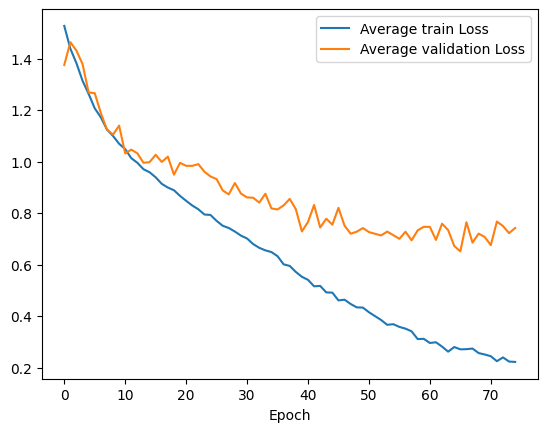

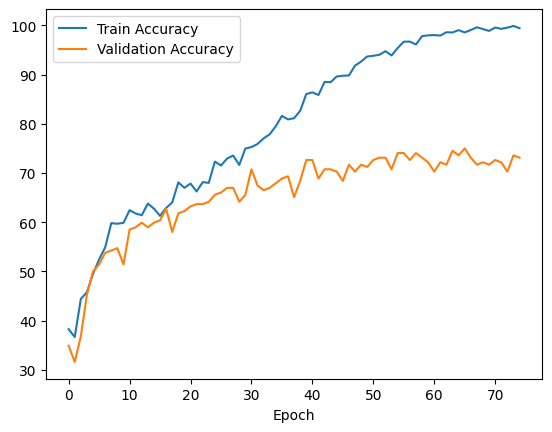

In [2]:
cnn_stats = train(
    experiment_name="cnn_1d",
    num_epochs=75,
    lr=1e-4,
    device='mps',
    progress_bar=False,
    progress=False
)
plot_stats(cnn_stats)

In [ ]:
cnn_rnn_stats = train(
    experiment_name="cnn_rnn",
    num_epochs=70,
    lr=0.0002,
    device='cuda',
    progress_bar=False,
    progress=False
)
plot_stats(cnn_stats)